In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
data=pd.read_csv('F:/Machine Learning/banking.csv')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
data.shape

(41188, 21)

In [5]:
len(data)

41188

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [9]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

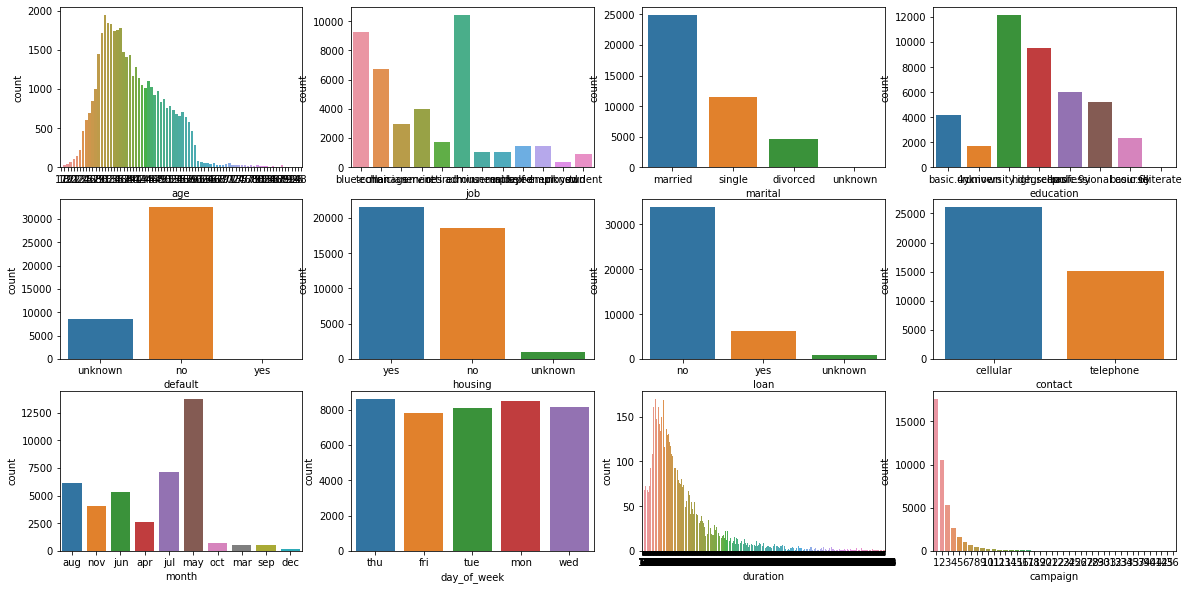

In [10]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))
for var, subplot in zip(data, ax.flatten()):
    sns.countplot(data[var], ax=subplot)

In [11]:
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp_var_rate        10
cons_price_idx      26
cons_conf_idx       26
euribor3m          316
nr_employed         11
y                    2
dtype: int64

In [12]:
data['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [13]:
data['poutcome'].unique()

array(['nonexistent', 'success', 'failure'], dtype=object)

In [14]:
data.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


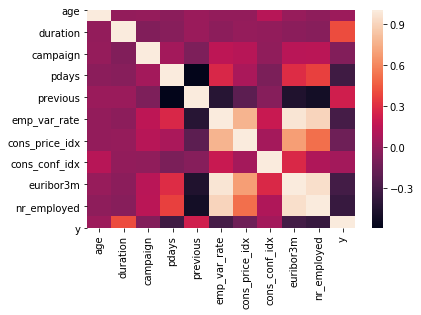

In [15]:
sns.heatmap(data.corr())

In [16]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data=data.apply(label.fit_transform)

In [17]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,27,1,1,0,1,2,0,0,1,2,...,0,26,0,1,9,13,17,307,10,0
1,36,9,1,7,0,0,0,0,7,0,...,0,26,0,1,7,11,7,267,9,0
2,11,4,2,6,0,2,0,0,4,2,...,2,6,2,2,4,20,13,59,1,1
3,22,7,1,3,0,0,0,0,0,0,...,1,26,0,1,3,10,3,221,6,0
4,38,5,1,0,0,2,0,0,1,0,...,0,3,1,2,2,0,22,116,5,1


In [18]:
X=data.drop(['y'],axis=1)

In [19]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,27,1,1,0,1,2,0,0,1,2,210,0,26,0,1,9,13,17,307,10
1,36,9,1,7,0,0,0,0,7,0,138,0,26,0,1,7,11,7,267,9
2,11,4,2,6,0,2,0,0,4,2,339,2,6,2,2,4,20,13,59,1
3,22,7,1,3,0,0,0,0,0,0,185,1,26,0,1,3,10,3,221,6
4,38,5,1,0,0,2,0,0,1,0,137,0,3,1,2,2,0,22,116,5


In [20]:
y=data['y']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: y, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.4,random_state=1)

# DECISION TREE

In [22]:
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [23]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
accuracy_score(Y_test,y_pred)

0.8896576839038601

In [26]:
model.score(X_test,Y_test)

0.8896576839038601

In [27]:
confusion_matrix(Y_test,y_pred)

array([[13675,   931],
       [  887,   983]], dtype=int64)

In [28]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     14606
           1       0.51      0.53      0.52      1870

    accuracy                           0.89     16476
   macro avg       0.73      0.73      0.73     16476
weighted avg       0.89      0.89      0.89     16476



# RANDOM FOREST 

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [30]:
model1=RandomForestClassifier(n_estimators=100)
model1.fit(X_train, Y_train)

RandomForestClassifier()

In [31]:
predict = model1.predict(X_test)
predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [32]:
accuracy_score(predict,Y_test)

0.9154527798009225

In [33]:
model1.score(X_test,Y_test)

0.9154527798009225

In [34]:
model1.score(X_train,Y_train)

1.0

In [35]:
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14606
           1       0.67      0.51      0.58      1870

    accuracy                           0.92     16476
   macro avg       0.80      0.74      0.76     16476
weighted avg       0.91      0.92      0.91     16476



# BAGGING

In [36]:
from sklearn.ensemble import BaggingClassifier

In [37]:
model2=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=20)
model2.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=20)

In [38]:
pred=model2.predict(X_test)

In [39]:
pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [40]:
model2.score(X_train,Y_train)

0.97859339592101

In [41]:
model2.score(X_test,Y_test)

0.9136319495023064

In [42]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     14981
           1       0.52      0.65      0.58      1495

    accuracy                           0.91     16476
   macro avg       0.74      0.79      0.76     16476
weighted avg       0.92      0.91      0.92     16476



# BOOSTING

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
model3=AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=1,n_estimators=10)

In [45]:
model3.fit(X_train,Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=10)

In [46]:
ypred=model3.predict(X_test)

In [47]:
ypred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [48]:
model3.score(X_train,Y_train)

1.0

In [49]:
model3.score(X_test,Y_test)

0.8898397669337218

In [50]:
print(classification_report(ypred,Y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     14577
           1       0.52      0.51      0.52      1899

    accuracy                           0.89     16476
   macro avg       0.73      0.73      0.73     16476
weighted avg       0.89      0.89      0.89     16476



In [51]:
from sklearn.ensemble import VotingClassifier

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [53]:
dt=DecisionTreeClassifier()
lr=LogisticRegression()
knn=KNeighborsClassifier()

In [54]:
model4=VotingClassifier(estimators=[('dt',dt),('lr',lr),('knn',knn)],voting='hard')

In [55]:
model4.fit(X_train,Y_train)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier())])

In [56]:
y__pred=model4.predict(X_test)

In [57]:
y__pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [58]:
model4.score(X_train,Y_train)

0.9501456782130139

In [59]:
model4.score(X_test,Y_test)

0.9110220927409566

In [60]:
print(classification_report(y__pred,Y_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     15138
           1       0.47      0.65      0.54      1338

    accuracy                           0.91     16476
   macro avg       0.72      0.79      0.75     16476
weighted avg       0.93      0.91      0.92     16476

